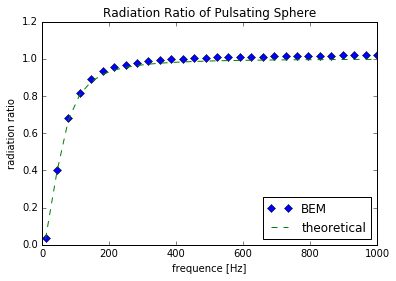

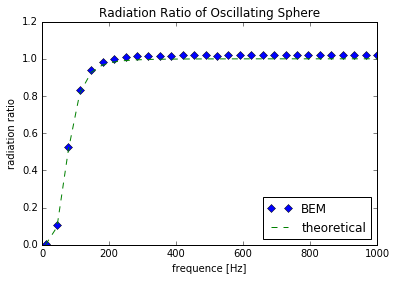

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from HelmholtzSolverRAD import *
from ExampleBoundaries import SphereRAD

def displayGraph(example, aF, aRatioBEM, aRatioTheo):
    plt.title('Radiation Ratio of ' + example + ' Sphere')
    lineBEM, = plt.plot(aF, aRatioBEM, 'D', label='BEM')
    lineTheo, = plt.plot(aF, aRatioTheo, '--', label='theoretical')
    plt.xlabel('frequence [Hz]')
    plt.ylabel('radiation ratio')
    plt.legend(handles=[lineBEM, lineTheo], loc='lower right')
    plt.show()

numberOfSamples = 30

solver = HelmholtzSolverRAD(*(SphereRAD()))

# Test Problem 1 - Pulsating Sphere
# Neumann condition with v perpendicular to the surface, and
# homogeneous over the full shpere. The the graph plotted also 
# contains the theoretical/closed-form solution.
boundaryCondition = BoundaryCondition(solver.aElement.shape[0])
boundaryCondition.alpha.fill(0.0)
boundaryCondition.beta.fill(1.0)
boundaryCondition.f.fill(1.0)

boundaryIncidence = BoundaryIncidence(solver.aElement.shape[0])
boundaryIncidence.phi.fill(0.0)
boundaryIncidence.v.fill(0.0)

aF = np.linspace(10, 1000, numberOfSamples, dtype=np.float32)
aNumericalRadiationRatio = np.empty(aF.size, dtype=np.float32)
aTheoreticalRadiationRatio = np.empty(aF.size, dtype=np.float32)

for i in range(aF.size):
    k = frequencyToWavenumber(aF[i])
    boundarySolution = solver.solveExteriorBoundary(k,boundaryCondition, boundaryIncidence)
    aNumericalRadiationRatio[i] = boundarySolution.radiationRatio()
    aTheoreticalRadiationRatio[i] = k**2 / (k**2+1)

displayGraph('Pulsating', aF, aNumericalRadiationRatio, aTheoreticalRadiationRatio)

# Test Problem 2 - Osillating Sphere
# Neumann condition with sphere oscillating along the z-axix. This
# results in a v(x) = z, where z is the z component of a given 
# point x on the shere.
for i in range(boundaryCondition.f.size):
    boundaryCondition.f[i] = solver.aCenters[i, 1]
for i in range(aF.size):
    k = frequencyToWavenumber(aF[i])
    boundarySolution = solver.solveExteriorBoundary(k,boundaryCondition, boundaryIncidence)
    aNumericalRadiationRatio[i] = boundarySolution.radiationRatio()
    aTheoreticalRadiationRatio[i] = k**4 / (k**4+4)

displayGraph('Oscillating', aF, aNumericalRadiationRatio, aTheoreticalRadiationRatio)


Copyright (C) 2017 Frank Jargstorff

This file is part of the AcousticBEM library.

AcousticBEM is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

AcousticBEM is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with AcousticBEM. If not, see http://www.gnu.org/licenses/.